## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

In [447]:
cabData = pd.read_csv("DataSets-main\\Cab_Data.csv")
cityData = pd.read_csv("DataSets-main\\City.csv")
customerData = pd.read_csv("DataSets-main\\Customer_ID.csv")
transactionData = pd.read_csv("DataSets-main\\Transaction_ID.csv")


## Exploring the Datasets

### Cab Data

In [6]:
cabData.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [19]:
cabData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [14]:
cabData.nunique()

Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
dtype: int64

### City Data

In [12]:
cityData.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [18]:
cityData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


Let us convert the data type of columns Population and Users. First, we have to remove the commas.

In [308]:
cityData["Population"] = cityData["Population"].str.replace(",","")
cityData["Users"] = cityData["Users"].str.replace(",","")

In [314]:
cityData["Population"] = cityData["Population"].astype("Int64")
cityData["Users"] = cityData["Users"].astype("Int64")
cityData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     Int64 
 2   Users       20 non-null     Int64 
dtypes: Int64(2), object(1)
memory usage: 648.0+ bytes


In [15]:
cityData.nunique()

City          20
Population    20
Users         20
dtype: int64

### Customer Data

In [11]:
customerData.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [20]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [16]:
customerData.nunique()

Customer ID           49171
Gender                    2
Age                      48
Income (USD/Month)    23341
dtype: int64

### Transaction Data

In [13]:
transactionData.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [21]:
transactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [17]:
transactionData.nunique()

Transaction ID    440098
Customer ID        49171
Payment_Mode           2
dtype: int64

#### Insights from the above Data

There are 440098 unique transactions in the transaction data set. However there are only 359392 unique transaction ids in the cab data csv. There are almost 9000 missing cab trips.
Initially we merge the cab data and the transanction data. This would allow us to merge the customer data to this later on.

## Merging the Datasets

The date of travel column will have no use here  - unless we have more information as to whether a day was a weekday or a holiday. So it is safe to drop the column before building the complete dataset. We however use this column later on to seperate the transactions based on the year. The process has been documented further in this report.

In [27]:
cabData = cabData.drop("Date of Travel",axis=1)
cabData.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776


first let us merge the cab data with the transaction data. merging these would not produce any redundant data. 

In [28]:
fullData = cabData.merge(transactionData,on="Transaction ID")
fullData.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [50]:
fullData.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000


In [29]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Company         359392 non-null  object 
 2   City            359392 non-null  object 
 3   KM Travelled    359392 non-null  float64
 4   Price Charged   359392 non-null  float64
 5   Cost of Trip    359392 non-null  float64
 6   Customer ID     359392 non-null  int64  
 7   Payment_Mode    359392 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 24.7+ MB


The customer data and City data have not be merged with the cab data as that would result in redundant data. The customer data has been merged later on for further analysis.

# Exploratory Data Analysis

### First, let us explore the different datasets and try to make some high level observations before we start with the indepth analysis

#### Cab and Transaction Datasets

[Text(0, -20, '84711'), Text(0, -20, '274681')]

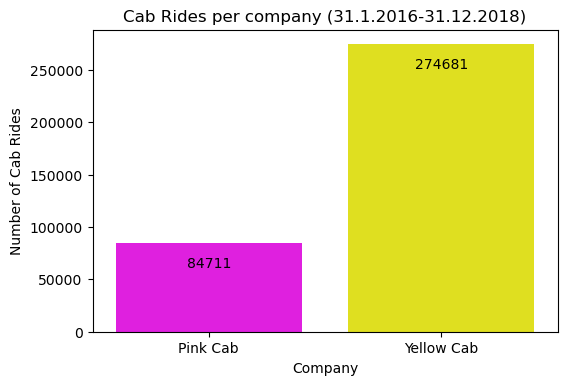

In [758]:
plt.figure(dpi=100)
ax = sns.countplot(data=fullData,x="Company",palette=["magenta","yellow"])
plt.title("Cab Rides per company (31.1.2016-31.12.2018)")
plt.ylabel("Number of Cab Rides")
ax.bar_label(ax.containers[0],padding=-20)

As can be seen from the above plot, there are more than double the number of Yellow Cab trips than the number of Pink Cab trips. 

#### Spread of rides across the various cities

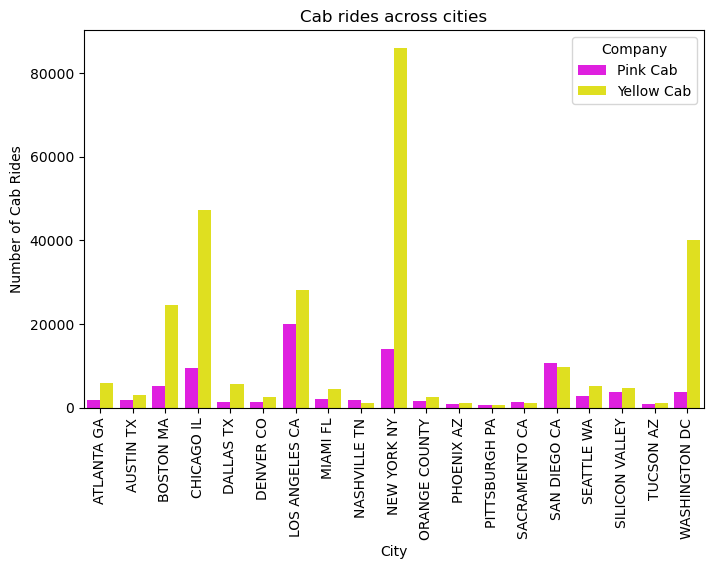

In [760]:
plt.figure(figsize=(8,5),dpi=100)
sns.countplot(data=fullData,x="City",hue="Company",palette=["magenta","yellow"])
plt.xticks(rotation='vertical')
plt.title("Cab rides across cities")
plt.ylabel("Number of Cab Rides")
plt.show()

As expected, the Yellow cab company dominates in most of the cities. We will later analyse, in a future section, those cities where the Pink Cab company has a higher trip share.

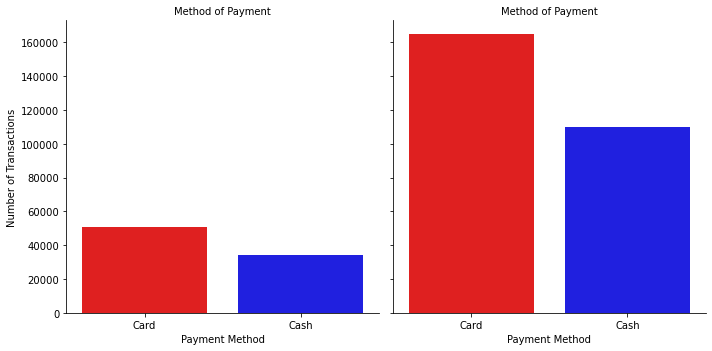

In [763]:
ax=sns.catplot(data=fullData,x="Payment_Mode",kind="count",col="Company",palette=["red","blue"])
ax.set_titles("Method of Payment")
ax.set_axis_labels("Payment Method","Number of Transactions")

Text(0, 0.5, 'Number of trips')

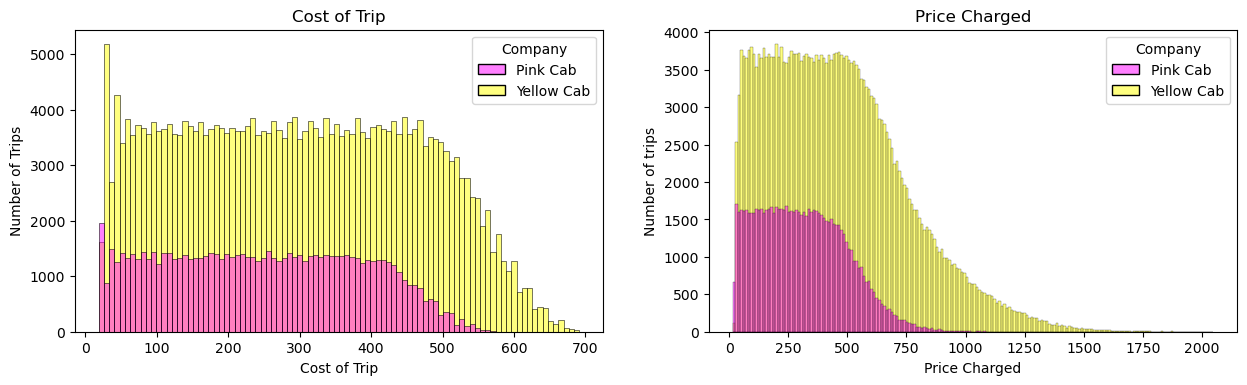

In [767]:
figure, axes = plt.subplots(1,2,figsize=(15,4),dpi=100)
sns.histplot(data=fullData,x="Cost of Trip",hue="Company",palette=["magenta","yellow"],ax=axes[0])
sns.histplot(data=fullData,x="Price Charged",hue="Company",palette=["magenta","yellow"],ax=axes[1])
axes[0].set_title("Cost of Trip")
axes[1].set_title("Price Charged")
axes[0].set_ylabel("Number of Trips")
axes[1].set_ylabel("Number of trips")

#### Is there a difference in the way customers are charged?

Text(0.5, 1.0, 'Distance travelled vs Price Charged')

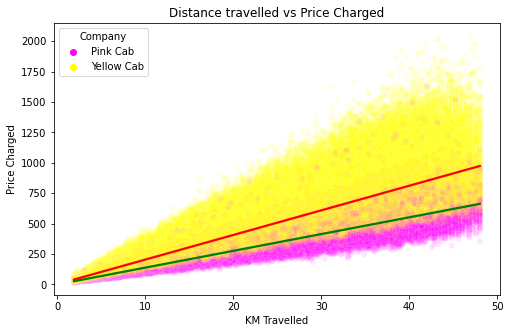

In [768]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=fullData,y="Price Charged",x="KM Travelled",hue="Company",alpha=0.1,palette=["magenta","yellow"])
sns.regplot(data=fullData[fullData["Company"]=="Pink Cab"],y="Price Charged",x="KM Travelled",scatter=False,color="green")
sns.regplot(data=fullData[fullData["Company"]=="Yellow Cab"],y="Price Charged",x="KM Travelled",scatter=False,color="red")
plt.title("Distance travelled vs Price Charged")

It can be seen that the Yellow Cab company tends to charge higher prices than the pink cab company for the same distance travelled.

#### City Data

In [316]:
cityData["Population"].dtype

Int64Dtype()

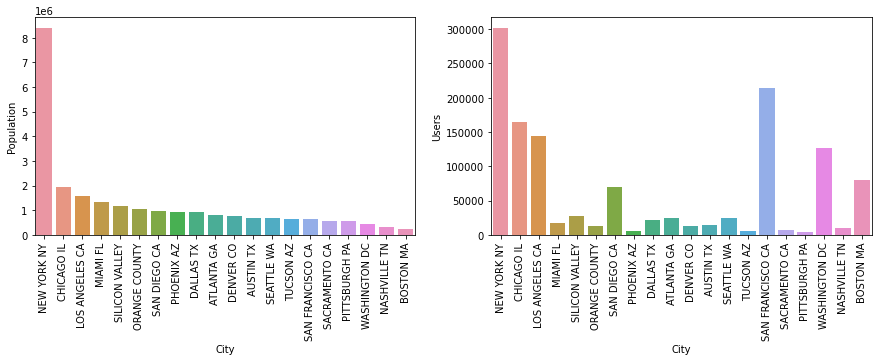

In [329]:
figure, axes = plt.subplots(1,2,figsize=(15,4))
sns.barplot(data=cityData,x="City",y="Users",ax=axes[1])
sns.barplot(data=cityData,x="City",y="Population",ax=axes[0])
axes[0].tick_params(axis="x", labelrotation = 90)
axes[1].tick_params(axis="x",labelrotation=90)

#### Customer Data

In [347]:
customerData.head(3)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242


In [331]:
customerData.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


<AxesSubplot:xlabel='Income (USD/Month)'>

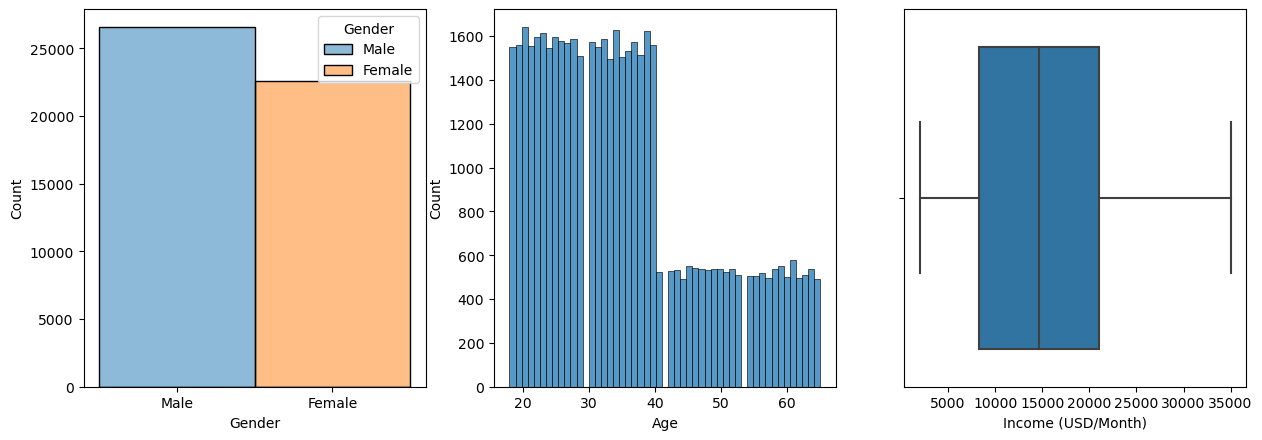

In [357]:
figure, axes = plt.subplots(1,3,figsize=(15,5),dpi=100)
sns.histplot(data=customerData,x="Age",ax=axes[1])
sns.histplot(data=customerData,x="Gender",ax=axes[0],hue="Gender")
sns.boxplot(data=customerData,x="Income (USD/Month)",ax=axes[2])

# Which Company should XYZ invest in?

#### Comparing Profits made

Let us first add a column called Trip Profit. It is calculated as the difference between the price charged and the trip cost.

In [238]:
fullData["Trip Profit"] = fullData["Price Charged"]-fullData["Cost of Trip"]
fullData.head(3)

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Trip Profit
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,57.315
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,23.666
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,27.568


Now lets compute the total profit gained by each company over the given period.

In [259]:
totalProfits=fullData.groupby("Company")["Trip Profit"].sum()
pinkProfit = totalProfits[0]
yellowProfit = totalProfits[1]

print("\tTotal Profits for both Cab Companies\n")
print("Pink Cab: $",pinkProfit," Yellow Cab: $",yellowProfit)

	Total Profits for both Cab Companies

Pink Cab: $ 5307328.321  Yellow Cab: $ 44020373.1708


Let us compute the average profit per trip since the total trips done by the yellow cabs is much higher.

In [263]:
averagePinkProfit = pinkProfit/fullData.groupby("Company")["Trip Profit"].count()[0]
averageYellowProfit = yellowProfit/fullData.groupby("Company")["Trip Profit"].count()[1]

print("\tAverage Profits for both Cab Companies\n")
print("Pink Cab: $",averagePinkProfit," Yellow Cab: $",averageYellowProfit)

	Average Profits for both Cab Companies

Pink Cab: $ 62.65217410961977  Yellow Cab: $ 160.25998584103013


The Yellow Cab company seems to be doing much better in terms of profits.

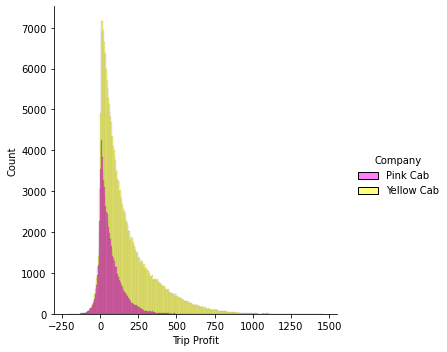

In [277]:
sns.displot(data=fullData, x="Trip Profit", hue="Company",palette=["magenta","yellow"])

<AxesSubplot:xlabel='Trip Profit', ylabel='Company'>

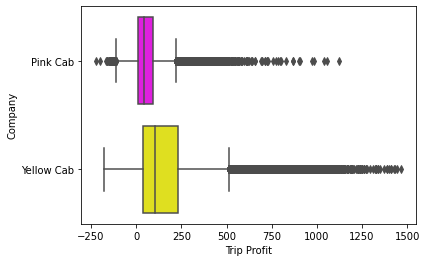

In [278]:
sns.boxplot(data=fullData,x="Trip Profit",y="Company",palette=["magenta","yellow"])

In [769]:
fullData.groupby("Company")["Trip Profit"].mean()

Company
Pink Cab       62.652174
Yellow Cab    160.259986
Name: Trip Profit, dtype: float64

### Profit per KM

In [400]:
averagePinkProfitperKM = pinkProfit/fullData.groupby("Company")["KM Travelled"].sum()[0]
averageYellowProfitperKM = yellowProfit/fullData.groupby("Company")["KM Travelled"].sum()[1]
print("\tAverage Profits for both Cab Companies\n")
print("Pink Cab: $",averagePinkProfitperKM," Yellow Cab: $",averageYellowProfitperKM)

	Average Profits for both Cab Companies

Pink Cab: $ 2.7771456221264086  Yellow Cab: $ 7.100727347984197


In [420]:
profitData = pd.DataFrame({"Pink Cab":[pinkProfit,averagePinkProfit,averagePinkProfitperKM],
                           "Yellow Cab":[yellowProfit,averageYellowProfit,averageYellowProfitperKM]},
                          index=['Total Profit', 'Average Profit/Trip',"Average Profit/KM"])
profitData

,Pink Cab,Yellow Cab
Total Profit,5.307328e+06,4.402037e+07
Average Profit/Trip,6.265217e+01,1.602600e+02
Average Profit/KM,2.777146e+00,7.100727e+00


## City wise Profits

In [751]:
def profitableTrips(profits):
    return round(len([x for x in profits if x>0])/len(profits)*100,2)

In [752]:
profitAnalysis = pd.DataFrame(fullData.groupby(["City","Company"])["Trip Profit"].agg(profitableTrips).reset_index()).sort_values(by="Trip Profit")

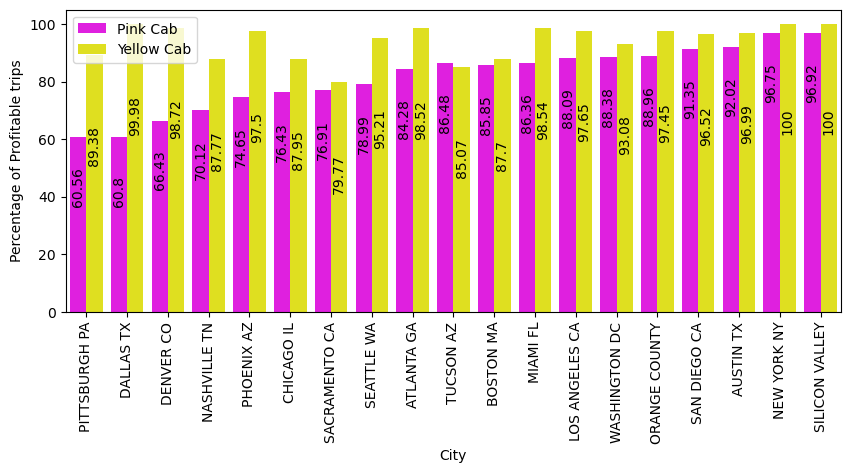

In [773]:
plt.figure(figsize=(10,4),dpi=100)
plt.xticks(rotation=90)
ax = sns.barplot(data=profitAnalysis,y="Trip Profit",x="City",estimator=np.mean,hue="Company",palette=["magenta","yellow"])
ax.bar_label(ax.containers[0],rotation=90,padding=-50)
ax.bar_label(ax.containers[1],rotation=90,padding=-80)
ax.set_ylabel("Percentage of Profitable trips")
plt.legend(loc=2)
plt.show()

## Mean Price Charged and Mean Distance travelled per city

In [591]:
cityWiseCab = fullData.groupby(["City","Company"])[["Price Charged","KM Travelled"]].mean()

pinkCab = cityWiseCab.xs(key="Pink Cab",level="Company").reset_index()
yellowCab = cityWiseCab.xs(key="Yellow Cab",level="Company").reset_index()

In [590]:
yellowCabMeanPrice = fullData.groupby(["Company"])["Price Charged"].mean()[1]
pinkCabMeanPrice = fullData.groupby(["Company"])["Price Charged"].mean()[0]

print("Mean price charged by Yellow Cab Company: ",yellowCabMeanPrice)
print("Mean price charged by Pink Cab Company: ",pinkCabMeanPrice)

Mean price charged by Yellow Cab Company:  458.18198998110535
Mean price charged by Pink Cab Company:  310.8008562052154


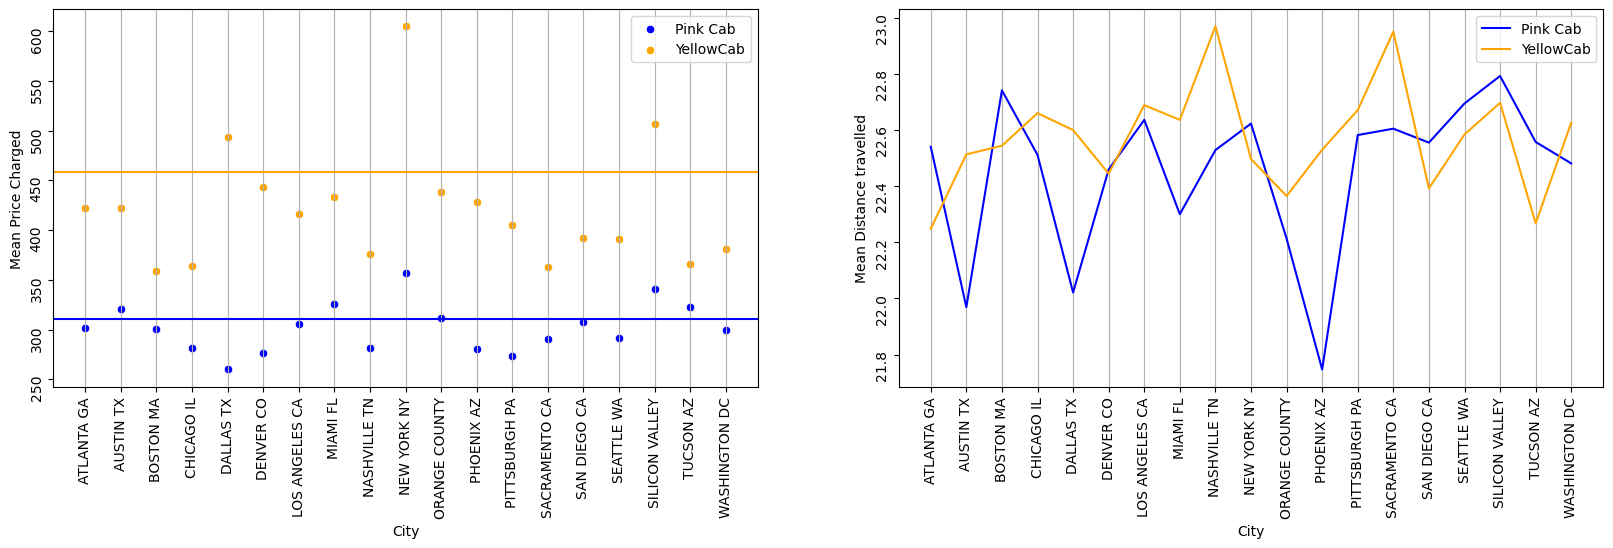

In [775]:
figure, axes = plt.subplots(1,2,figsize=(20,5),dpi=100)

axes[0].grid(axis="x")
sns.scatterplot(data=pinkCab,x="City",y="Price Charged",color="blue",ax=axes[0])
sns.scatterplot(data=yellowCab,x="City",y="Price Charged",color="orange",ax=axes[0])
axes[0].tick_params(labelrotation=90)
axes[0].legend(labels=["Pink Cab","YellowCab"])
axes[0].axhline(y = yellowCabMeanPrice, color = 'orange', linestyle = '-')
axes[0].axhline(y = pinkCabMeanPrice, color = 'blue', linestyle = '-')
axes[0].set_ylabel("Mean Price Charged")

sns.lineplot(data=pinkCab,x="City",y="KM Travelled",color="blue",ax=axes[1])
sns.lineplot(data=yellowCab,x="City",y="KM Travelled",color="orange",ax=axes[1])
axes[1].tick_params(labelrotation=90)
axes[1].grid(axis="x")
axes[1].set_ylabel("Mean Distance travelled")


axes[1].legend(labels=["Pink Cab","YellowCab"])

Though the average ride distance is quite similar (between 21 and 23 km) for both cab companies, the average prices charged by the Yellow cabs are much higher, there is more $100 between the means. In most major cities, the yellow Cab company charges almost 1.5 times higher than the Pink Cab company.

# Combing Customer Data to find further insights

In [396]:
fullData.head(2)

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Trip Profit
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,57.315
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,23.666


In [397]:
customerData.head(2)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237


In [398]:
myData = fullData.merge(customerData,on="Customer ID")
myData.head(2)

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Trip Profit,Gender,Age,Income (USD/Month)
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,57.3150,Male,28,10813
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,281.2772,Male,28,10813


# Computing yearly Data

In [449]:
cabData["Date of Travel"].max()-cabData["Date of Travel"].min()

1094

In [451]:
cabData["Date of Travel"].min()

42371

In [789]:
cabData["Date of Travel"] = cabData["Date of Travel"]-42370

We take the above date as the first day of the given period. We then split the dates based on the following conditions.

In [464]:
def getYear(day):
    if day<=365:
        return "2016"
    elif day>365 and day<=730:
        return "2017"
    else:
        return "2018"

In [467]:
year=cabData["Date of Travel"].apply(getYear)
myData["Year"]=year

## Total Yearly Profit and Average Profit per Trip

Text(0, 0.5, 'Total Profit')

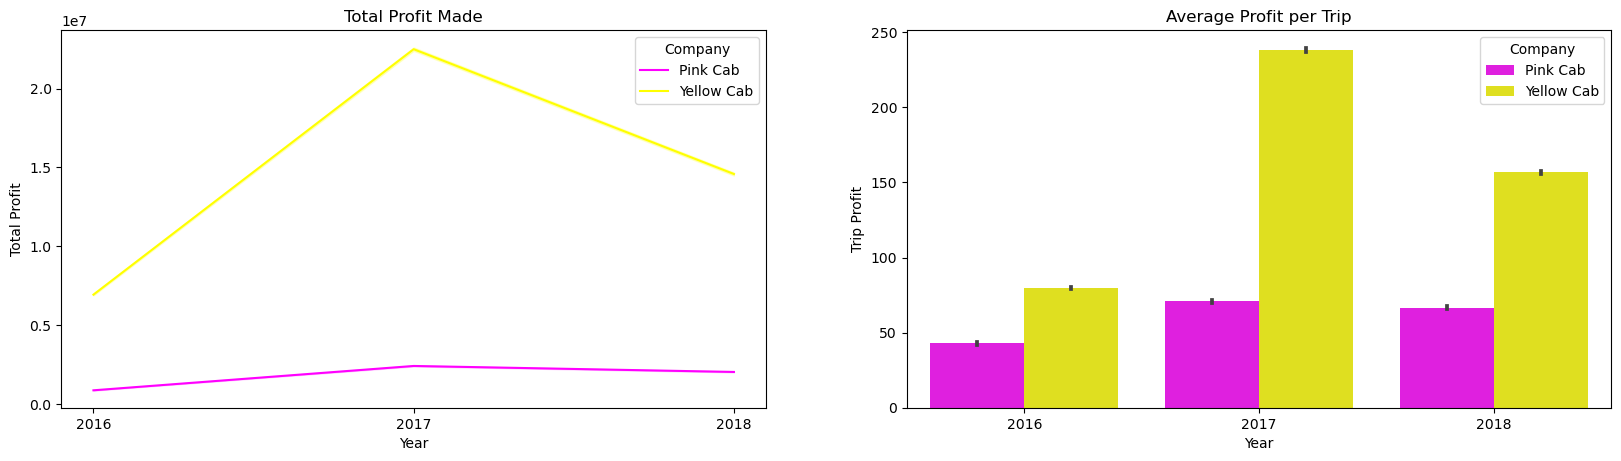

In [793]:
figure, axes = plt.subplots(1,2,figsize=(20,5),dpi=100)
sns.barplot(data=myData,x="Year",y="Trip Profit",hue="Company",palette=["magenta","yellow"],ax=axes[1])
sns.lineplot(data=myData,x="Year",y="Trip Profit",hue="Company",palette=["magenta","yellow"],ax=axes[0],estimator=np.sum)
axes[0].set_title("Total Profit Made")
axes[1].set_title("Average Profit per Trip")
axes[0].set_ylabel("Total Profit")

## Citywise profit per trip

<AxesSubplot:xlabel='City', ylabel='Trip Profit'>

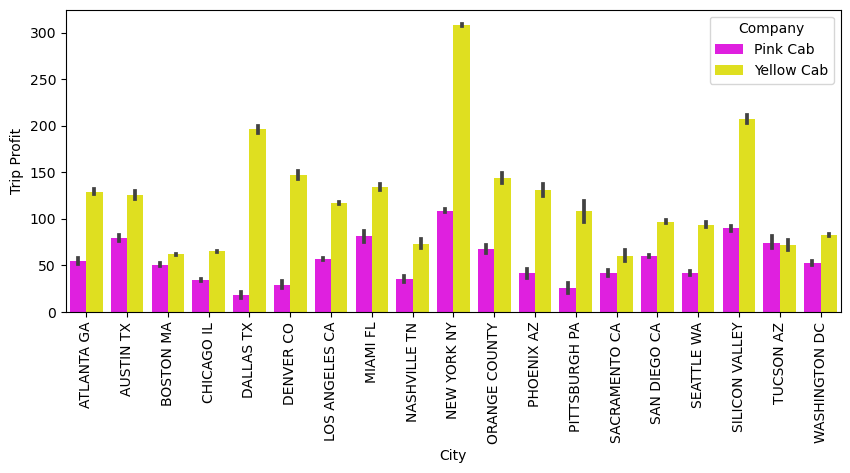

In [582]:
plt.figure(figsize=(10,4),dpi=100)
plt.xticks(rotation=90)
sns.barplot(data=myData,y="Trip Profit",x="City",estimator=np.mean,hue="Company",palette=["magenta","yellow"])

## Customer count per year for each company

In [600]:
yearWiseCustomer = pd.DataFrame(myData.groupby(["Year","Company"])["Customer ID"].nunique().reset_index())
yearWiseCustomer

,Year,Company,Customer ID
0,2016,Pink Cab,9609
1,2016,Yellow Cab,13789
2,2017,Pink Cab,8631
3,2017,Yellow Cab,9650
4,2018,Pink Cab,14264
5,2018,Yellow Cab,16910


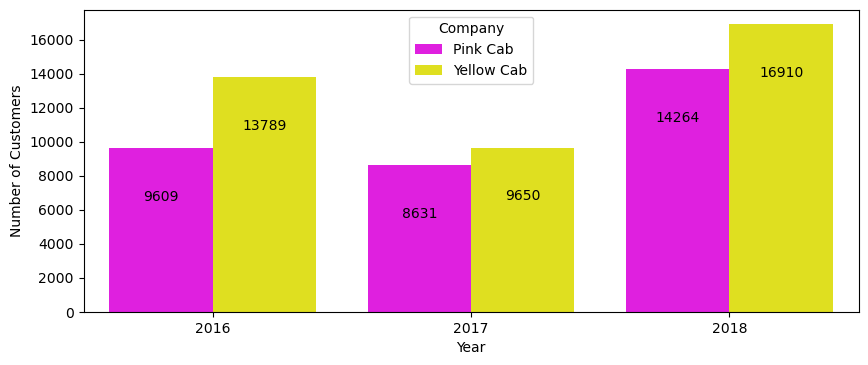

In [776]:
yearWiseCustomer = pd.DataFrame(myData.groupby(["Year","Company"])["Customer ID"].nunique().reset_index())
plt.figure(figsize=(10,4),dpi=100)
ax=sns.barplot(data=yearWiseCustomer,x="Year",y="Customer ID",hue="Company",palette=["magenta","yellow"])
ax.bar_label(ax.containers[0],padding=-40)
ax.bar_label(ax.containers[1],padding=-40)
ax.set_ylabel("Number of Customers")
plt.show()

## City wise customer split between Yellow and Pink Cab

In [623]:
cityWiseCustomer = pd.DataFrame(myData.groupby(["City","Company"])["Customer ID"].nunique().reset_index()).sort_values(by="Customer ID",ascending=False)

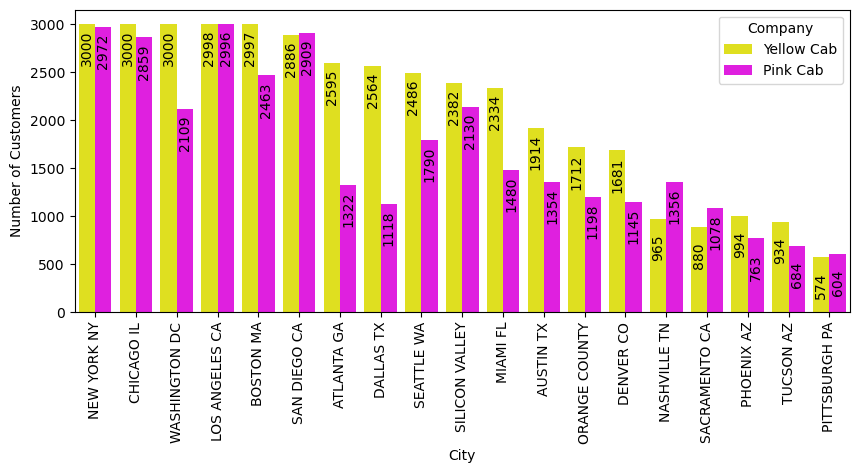

In [777]:
plt.figure(figsize=(10,4),dpi=100)
plt.xticks(rotation=90)
ax=sns.barplot(data=cityWiseCustomer,x="City",y="Customer ID",hue="Company",palette=["yellow","magenta"])
ax.bar_label(ax.containers[0],rotation=90,padding=-30)
ax.bar_label(ax.containers[1],rotation=90,padding=-30)
ax.set_ylabel("Number of Customers")
plt.show()

## Age and Gender wise customer split

<AxesSubplot:xlabel='Age', ylabel='Count'>

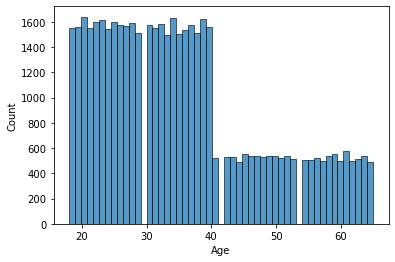

In [608]:
sns.histplot(data=customerData,x="Age")

Let us split the customers into three groups: Below 30, 30-50 and Above 50.

In [690]:
conditions = [
    myData['Age']<30,
    myData['Age']<=50,
    myData['Age']>50
]

choices = ["Below 30","30-50","Above 50"]

myData["Age Group"] = np.select(conditions, choices, default=0)

In [693]:
ageWiseCustomer = pd.DataFrame(myData.groupby(["Age Group","Company"])["Customer ID"].nunique().reset_index()).sort_values(by="Customer ID")
ageWiseProfit = pd.DataFrame(myData.groupby(["Age Group","Company","Year"])[["Trip Profit"]].mean().reset_index())


In [697]:
genderWiseCustomer = pd.DataFrame(myData.groupby(["Gender","Company"])["Customer ID"].nunique().reset_index()).sort_values(by="Customer ID")
genderWiseProfit = pd.DataFrame(myData.groupby(["Gender","Company","Year"])[["Trip Profit"]].mean().reset_index())

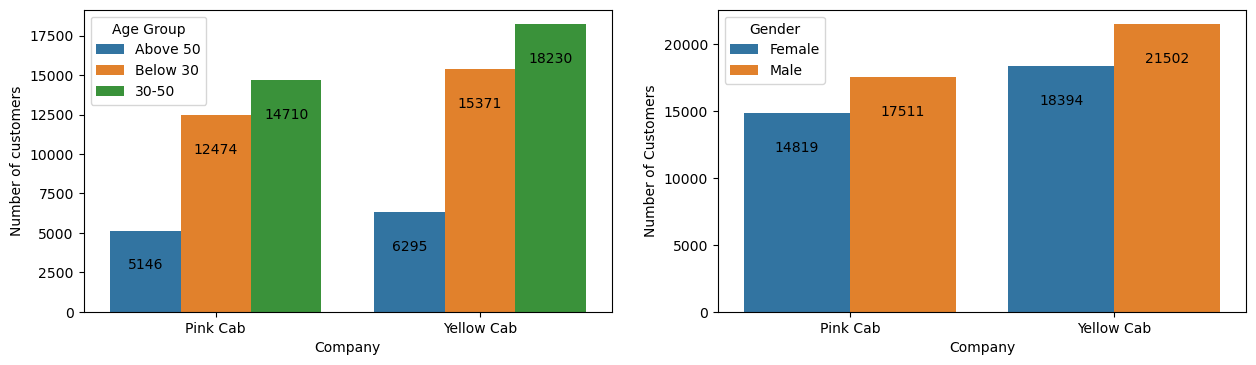

In [783]:
figure, axes = plt.subplots(1,2,figsize=(15,4),dpi=100)
sns.barplot(data=ageWiseCustomer,x="Company",y="Customer ID",hue="Age Group",ax=axes[0])
sns.barplot(data=genderWiseCustomer,x="Company",y="Customer ID",hue="Gender",ax=axes[1])
axes[0].bar_label(axes[0].containers[0],padding=-30)
axes[0].bar_label(axes[0].containers[1],padding=-30)
axes[0].bar_label(axes[0].containers[2],padding=-30)
axes[0].set_ylabel("Number of customers")

axes[1].bar_label(axes[1].containers[0],padding=-30)
axes[1].bar_label(axes[1].containers[1],padding=-30)
axes[1].set_ylabel("Number of Customers")

plt.show()

## Age and Gender vs Profit

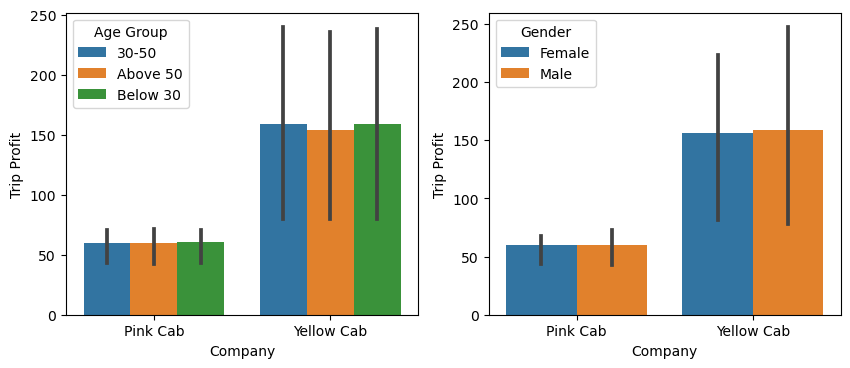

In [788]:
figure, axes = plt.subplots(1,2,figsize=(10,4),dpi=100)
sns.barplot(data=ageWiseProfit,x="Company",y="Trip Profit", hue="Age Group",ax=axes[0],errwidth=None)
sns.barplot(data=genderWiseProfit,x="Company",y="Trip Profit", hue="Gender",ax=axes[1],errwidth=None)

plt.show()